## Business Problem
This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order **to predict the outcome of the drugs type** that might be suitable for the patient.



The following is the **structure of the data set**.


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Age</b></td>
<td>Patient Age</td>
<td>23; 47; ...</td>
</tr>
<tr>
<td><b>Sex</b></td>
<td>Gender of patient <br> (male or female)</td>
<td>F; M; ...</td>
</tr>
<tr>
<td><b>BP</b></td>
<td>Levels of blood pressure <br> (high, normal, or low)</td>
<td>HIGH; NORMAL; LOW; ...</td>
</tr>
<tr>
<td><b>Cholesterol</b></td>
<td>Levels of cholesterol <br> (high or normal)</td>
<td>1.4; 1.3; ...</td>
</tr>
<tr>
<td><b>Na_to_K</b></td>
<td>Sodium to potassium ratio in blood</td>
<td>25.355; 13.093; ...</td>
</tr>
<tr>
<td><b>Drug</b></td>
<td>Type of drug</td>
<td>DrugY; drugC; ...</td>
</tr>
</tbody>
</table>



### Importing Libraries 

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Reading Data Set 

In [61]:
df_drug = pd.read_csv("drug200.csv")

In [62]:
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [64]:
df_drug['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [65]:
df_drug.shape

(200, 6)

In [63]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Initial Dataset Exploration 


#### Categorical Variables 

In [66]:
df_drug.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

 It can be seen that from results above, DrugY has more amount than other types of drugs

In [67]:
df_drug.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

 The distribution of patient gender is balanced.

In [68]:
df_drug.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

 The distribution of blood pressure level is balanced.

In [70]:
df_drug.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

 The distribution of cholesterol level is balanced.

##  Numerical Variables 
This section will show mean, count, std, min, max and others using describe function. The skewness value for each numerical variables will also shown in this section.

In [71]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [72]:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [73]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


C:\Users\User\anaconda3\envs\My_Project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


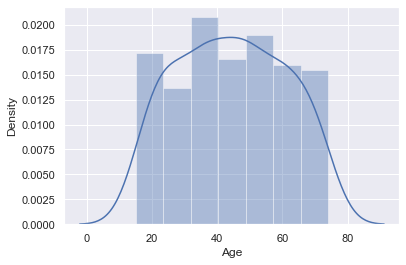

In [74]:
sns.distplot(df_drug['Age']);

C:\Users\User\anaconda3\envs\My_Project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


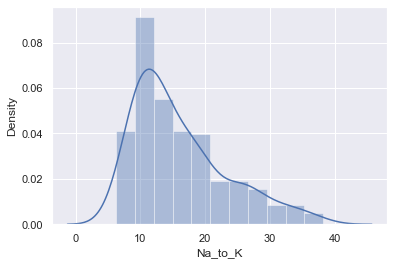

In [75]:
sns.distplot(df_drug['Na_to_K']);

- The distribution of **'Age'** column is **symetric**, since the skewness value  between -0.5 and 0.5 <br>
- The distribution of **'Na_to_K'** column is **moderately skewed**, since the skewness value is ***between 0.5 and 1***. It can also be seen from the histogram for 'Na_to_K' column

#  EDA 


##  Drug Type Distribution 

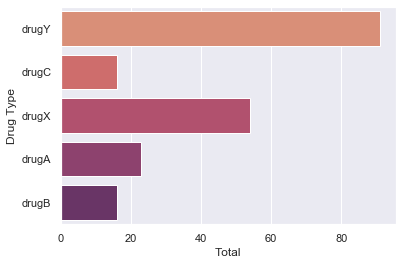

In [76]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df_drug, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

##  Gender Distribution 

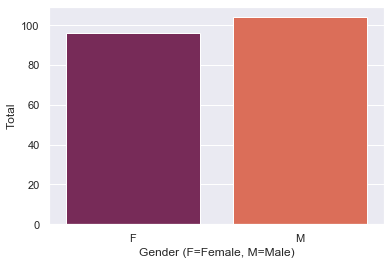

In [77]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df_drug, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

## Blood Pressure Distribution 

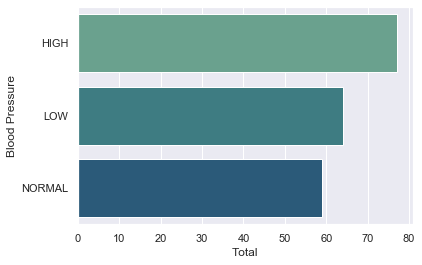

In [78]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df_drug, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

##  Cholesterol Distribution 

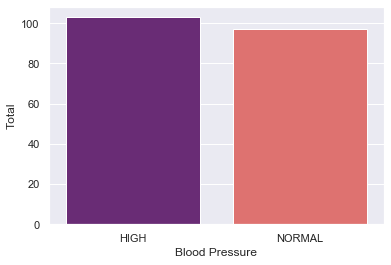

In [79]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df_drug, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

## Gender Distribution based on Drug Type 

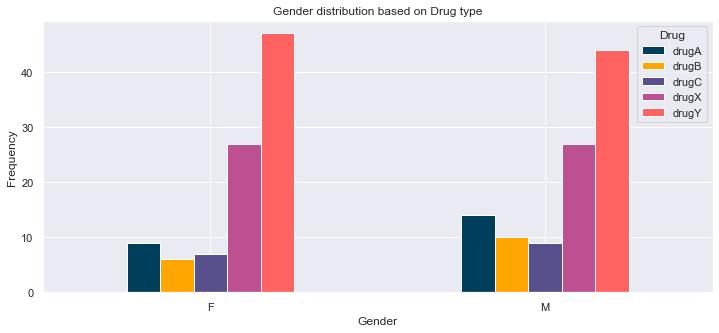

In [80]:
pd.crosstab(df_drug.Sex,df_drug.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## Blood Pressure Distribution based on Cholesetrol

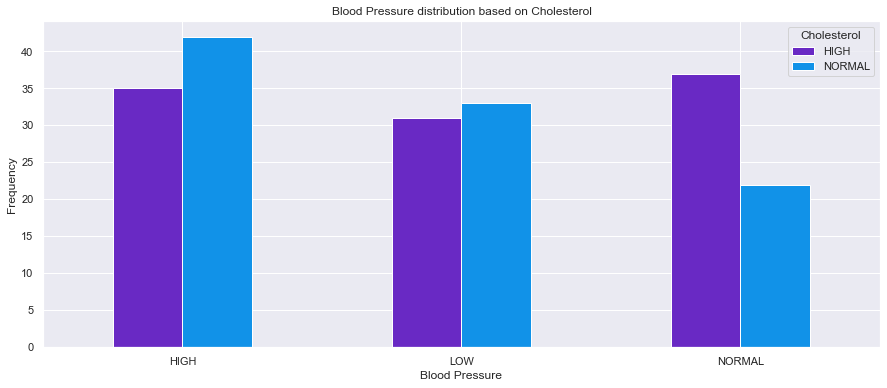

In [81]:
pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

##  Sodium to Potassium Distribution based on Gender and Age 

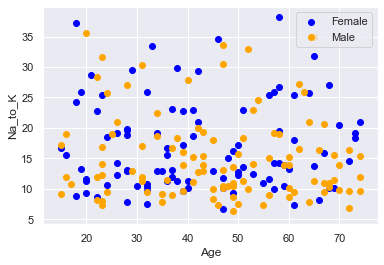

In [82]:
plt.scatter(x=df_drug.Age[df_drug.Sex=='F'], y=df_drug.Na_to_K[(df_drug.Sex=='F')], c="Blue")
plt.scatter(x=df_drug.Age[df_drug.Sex=='M'], y=df_drug.Na_to_K[(df_drug.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

#  Dataset Preparation

## Data Binning 

In [86]:
df_drug.Age

0      23
1      47
2      47
3      28
4      61
       ..
195    56
196    16
197    52
198    23
199    40
Name: Age, Length: 200, dtype: int64

###  Age 
The age will be divided into **7 age categories**:
*  Below 20 y.o.
*  20 - 29 y.o.
*  30 - 39 y.o.
*  40 - 49 y.o.
*  50 - 59 y.o.
*  60 - 69 y.o.
*  Above 70.

In [87]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df_drug['Age_binned'] = pd.cut(df_drug['Age'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['Age'], axis = 1)

### Na_to_K
The chemical ratio will be divided into **4 categories**:
*  Below 10.
*  10 - 20.
*  20 - 30.
*  Above 30.

In [88]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df_drug['Na_to_K_binned'] = pd.cut(df_drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df_drug.drop(['Na_to_K'], axis = 1)

In [89]:
df_drug.head()

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,drugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,drugY,60s,10-20


##  Splitting the dataset
 The dataset will be split into **70% training and 30% testing**.

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [92]:
X = df_drug.drop(["Drug"], axis=1)
y = df_drug["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

##  Feature Engineering 
 The FE method that used is **one-hot encoding**, which is **transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction**.

In [93]:
from sklearn.preprocessing import OneHotEncoder

In [125]:
X['Sex'].unique()

array(['F', 'M'], dtype=object)

In [28]:
# X_train['BP'].unique()

array(['LOW', 'NORMAL', 'HIGH'], dtype=object)

In [29]:
# X_train['Cholesterol'].unique()

array(['NORMAL', 'HIGH'], dtype=object)

In [30]:
# X_train['Age_binned'].unique()

[50s, 30s, >60s, 20s, 60s, 40s, <20s]
Categories (7, object): [<20s < 20s < 30s < 40s < 50s < 60s < >60s]

In [31]:
# X_train['Na_to_K_binned'].unique()

[>30, 10-20, 20-30, <10]
Categories (4, object): [<10 < 10-20 < 20-30 < >30]

In [94]:
myTest = X_train.iloc[0:2]
myTest

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned
131,M,LOW,NORMAL,50s,>30
96,F,LOW,HIGH,50s,>30


In [95]:
encoder=OneHotEncoder()

In [96]:
X_train = pd.DataFrame(encoder.fit_transform(X_train).toarray())
X_test = pd.DataFrame(encoder.fit_transform(X_test).toarray())

In [35]:
# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)

In [99]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [100]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##  SMOTE Technique 
(Synthetic Minority Oversampling Technique)

 Since the number of 'DrugY' is more than other types of drugs, **oversampling is carried out to avoid overfitting**.

In [102]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

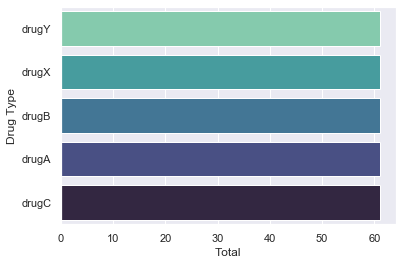

In [103]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df_drug, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

 As can be seen, the distrubtion of drug type are now balanced.

# Models 

## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.67      0.80        30

    accuracy                           0.83        60
   macro avg       0.77      0.93      0.83        60
weighted avg       0.88      0.83      0.83        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 3  1  2  4 20]]
Logistic Regression accuracy is: 83.33%


##  K Neighbours

In [105]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       drugA       0.22      0.40      0.29         5
       drugB       0.33      0.67      0.44         3
       drugC       0.36      1.00      0.53         4
       drugX       0.65      0.83      0.73        18
       drugY       0.82      0.30      0.44        30

    accuracy                           0.53        60
   macro avg       0.48      0.64      0.49        60
weighted avg       0.66      0.53      0.52        60

[[ 2  1  0  0  2]
 [ 1  2  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  3 15  0]
 [ 6  3  4  8  9]]
K Neighbours accuracy is: 53.33%


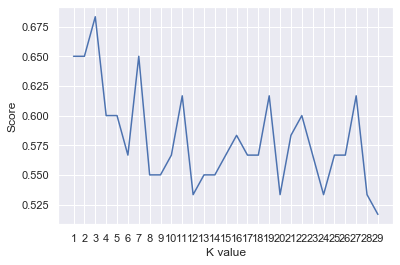

KNN Acc Max 68.33%


In [106]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

## Support Vector Machine (SVM)

In [107]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.70      0.82        30

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 2  1  2  4 21]]
SVC accuracy is: 85.00%


## Naive Bayes
###  Categorical NB

In [109]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.81      0.94      0.87        18
       drugY       0.95      0.67      0.78        30

    accuracy                           0.82        60
   macro avg       0.76      0.92      0.82        60
weighted avg       0.85      0.82      0.81        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 17  1]
 [ 3  1  2  4 20]]
Naive Bayes accuracy is: 81.67%


### Gaussian NB

In [110]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.70      0.82        30

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 2  1  2  4 21]]
Gaussian Naive Bayes accuracy is: 85.00%


# Model Comparison 

In [111]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM', 'Categorical NB', 'Gaussian NB'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, NBAcc1*100, NBAcc2*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,SVM,85.000000
5,Gaussian NB,85.000000
0,Logistic Regression,83.333333
4,Categorical NB,81.666667
2,K Neighbors Max,68.333333
1,K Neighbors,53.333333


In [112]:
import pickle

In [114]:
pickle.dump(LRclassifier,open('finalModel.pkl','wb'))

In [115]:
pickle.dump(encoder,open('finalEncoder.pkl','wb'))

In [116]:
model = pickle.load(open('finalModel.pkl','rb'))

In [117]:
enc = pickle.load(open('finalEncoder.pkl','rb'))

In [119]:
X

,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,20s,20-30
1,M,LOW,HIGH,40s,10-20
2,M,LOW,HIGH,40s,10-20
3,F,NORMAL,HIGH,20s,<10
4,F,LOW,HIGH,60s,10-20
...,...,...,...,...,...
195,F,LOW,HIGH,50s,10-20
196,M,LOW,HIGH,<20s,10-20
197,M,NORMAL,HIGH,50s,10-20
198,M,NORMAL,NORMAL,20s,10-20


In [121]:
tt = np.array([['M','NORMAL','NORMAL','40s','>30']])

In [122]:
sc = enc.transform(tt)

C:\Users\User\anaconda3\envs\My_Project\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [123]:
model.predict(sc)

array(['drugY'], dtype=object)

In [ ]:
# encData = enc.transform(myTest)

In [ ]:
# model.predict(myTest)

 From the results, it can be seen that most of ML models can reach **up to 80% accuracy** in predicting classification of drug type.